In [1]:
from google.colab import files
upload = files.upload()

Saving Purchase_Fraud_Data.csv to Purchase_Fraud_Data.csv


In [16]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED =42
LABELS = ["Normal","Fraud"]

In [3]:
data = pd.read_csv("Purchase_Fraud_Data.csv")
data.shape

(151112, 12)

In [4]:
data.head()

user_id          signup_time  ...         category        dob
0    22058  2015-02-24 22:55:49  ...  home_essentials  22-2-1976
1   333320  2015-06-07 20:39:50  ...         apparels   2-1-1962
2     1359  2015-01-01 18:52:44  ...      electronics   5-3-1962
3   150084  2015-04-28 21:13:25  ...      health_care   3-7-1974
4   221365  2015-07-21 07:09:52  ...  home_essentials  25-8-1970

[5 rows x 12 columns]

In [5]:
data.describe(include="all")

user_id          signup_time  ...     category        dob
count   151112.000000               151112  ...       151112     146188
unique            NaN               151112  ...            5      13745
top               NaN  2015-02-24 22:55:49  ...  electronics  24-7-1982
freq              NaN                    1  ...        32056         37
mean    200171.040970                  NaN  ...          NaN        NaN
std     115369.285024                  NaN  ...          NaN        NaN
min          2.000000                  NaN  ...          NaN        NaN
25%     100642.500000                  NaN  ...          NaN        NaN
50%     199958.000000                  NaN  ...          NaN        NaN
75%     300054.000000                  NaN  ...          NaN        NaN
max     400000.000000                  NaN  ...          NaN        NaN

[11 rows x 12 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [7]:
data.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex               4927
ip_address           0
class                0
category             0
dob               4924
dtype: int64

USER ID

In [8]:
len(data.user_id.unique())  

151112

In [22]:

count_classes = pd.value_counts(data['data'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("class")

plt.ylabel("Frequency")

KeyError: ignored

taking class 1 as fraud 
and class 0 as normal

In [10]:
Fraud = data[data['class']==1]
Normal= data[data['class']==0]


In [11]:
print(Fraud.shape,Normal.shape)

(14151, 12) (136961, 12)


Now this tells us that there are 14151 fraud transactions happened and normal were 136961

In [12]:
Fraud.purchase_value.describe()

count     14151.000000
mean      50838.790333
std       28581.772862
min        1053.000000
25%       26228.500000
50%       50909.000000
75%       75731.500000
max      100041.000000
Name: purchase_value, dtype: float64

Fraud average purchase is 50838 approx

In [13]:
Normal.purchase_value.describe()

count    136961.000000
mean      50488.682924
std       28528.595464
min        1016.000000
25%       25885.000000
50%       50433.000000
75%       75243.000000
max      100092.000000
Name: purchase_value, dtype: float64

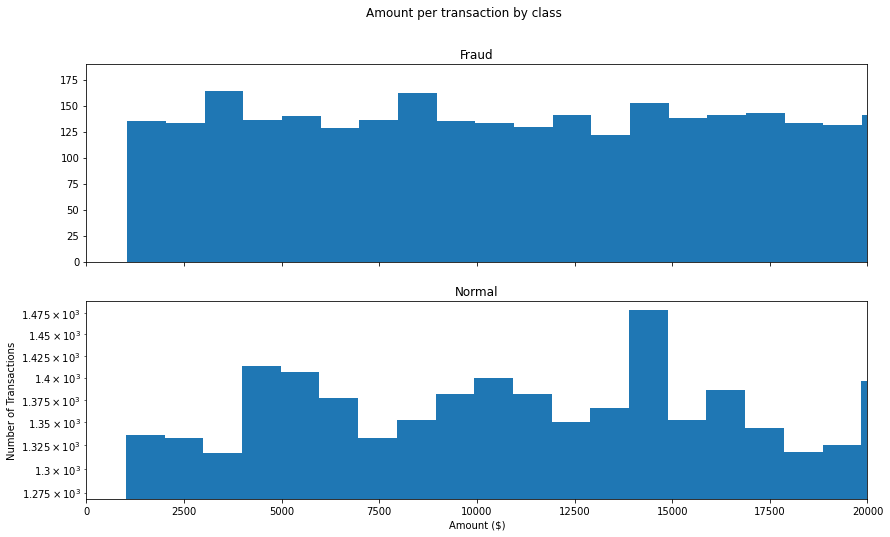

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(Fraud.purchase_value, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.purchase_value, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

ValueError: ignored

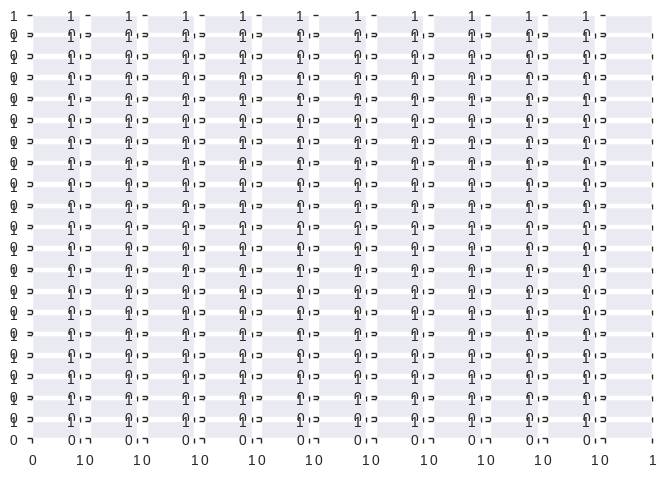

In [39]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(20, 11, sharex=True)
f.suptitle('Purchase time vs Purchase Value by class')
ax1.scatter(Fraud.purchase_time, Fraud.purchase_value)
ax1.set_title('Fraud')
ax2.scatter(Normal.purchase_time, Normal.purchase_value)
ax2.set_title('Normal')
plt.xlabel('date')
plt.ylabel('purchase_value')
plt.show()

Determine the number of fraud and valid transactions in the dataset

In [40]:
Fraud = data[data['class']==1]
Valid = data[data['class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [41]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.10332138345952498
Fraud Cases : 14151
Valid Cases : 136961


No. of fraudulent transactions are actually there as compare to normal transactions and therefore it is an imbalance dataset

In [42]:
data.drop(columns=["user_id"],inplace=True)

Signup Time : Date & Time at which the customer signup in the platform

In [43]:
data["signup_time"] = pd.to_datetime(data["signup_time"])

In [44]:
data["signup_time_year"] = data["signup_time"].dt.year
data["signup_time_month"] = data["signup_time"].dt.month
data["signup_time_day"] = data["signup_time"].dt.day
data["signup_time_week"] = data["signup_time"].dt.dayofweek
data["signup_time_hour"] = data["signup_time"].dt.hour
data.drop(columns = ["signup_time"],inplace=True)

Purchase Time:  The latest purchase date & time from a customer

In [45]:
data["purchase_time"] = pd.to_datetime(data["purchase_time"])

In [46]:
data["purchase_time_year"] = data["purchase_time"].dt.year
data["purchase_time_month"] = data["purchase_time"].dt.month
data["purchase_time_day"] = data["purchase_time"].dt.day
data["purchase_time_week"] = data["purchase_time"].dt.dayofweek
data["purchase_time_hour"] = data["purchase_time"].dt.hour
data.drop(columns = ["purchase_time"],inplace=True)

Purchase Value : Total purchase amount

In [47]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(data[["purchase_value"]])
data.purchase_value = SS.transform(data[["purchase_value"]])
data.head()

purchase_value      device_id  ... purchase_time_week purchase_time_hour
0        0.517164  QVPSPJUOCKZAR  ...                  5                  2
1        1.607844  EOGFQPIZPYXFZ  ...                  0                  1
2        0.237423  YSSKYOSJHPPLJ  ...                  3                 18
3       -0.240820  ATGTXKYKUDUQN  ...                  0                 13
4       -0.192947  NAUITBZFJKHWW  ...                  2                 18

[5 rows x 19 columns]

Device ID : Unique device ID from which purchase was done

In [48]:
data.device_id.unique

<bound method Series.unique of 0         QVPSPJUOCKZAR
1         EOGFQPIZPYXFZ
2         YSSKYOSJHPPLJ
3         ATGTXKYKUDUQN
4         NAUITBZFJKHWW
              ...      
151107    XPSKTWGPWINLR
151108    LYSFABUCPCGBA
151109    MEQHCSJUBRBFE
151110    CMCXFGRHYSTVJ
151111    ZINIADFCLHYPG
Name: device_id, Length: 151112, dtype: object>

In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(data[["device_id"]])
data.device_id = LE.transform(data[["device_id"]])
SS.fit(data[["device_id"]])
data.device_id = SS.transform(data[["device_id"]])
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


purchase_value  device_id  ... purchase_time_week purchase_time_hour
0        0.517164   0.508156  ...                  5                  2
1        1.607844  -1.127751  ...                  0                  1
2        0.237423   1.563005  ...                  3                 18
3       -0.240820  -1.632585  ...                  0                 13
4       -0.192947  -0.005644  ...                  2                 18

[5 rows x 19 columns]

Category : Type of product purchased

In [50]:
data.category.value_counts(normalize = True)

electronics        0.212134
cosmetics          0.198131
apparels           0.197006
health_care        0.196470
home_essentials    0.196258
Name: category, dtype: float64

In [51]:
temp = pd.get_dummies(data["category"],prefix="Category")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["category"])
data.head()

purchase_value  device_id  ... Category_health_care Category_home_essentials
0        0.517164   0.508156  ...                    0                        1
1        1.607844  -1.127751  ...                    0                        0
2        0.237423   1.563005  ...                    0                        0
3       -0.240820  -1.632585  ...                    1                        0
4       -0.192947  -0.005644  ...                    0                        1

[5 rows x 23 columns]

Source : Medium through which customers reached the platform

In [52]:
data.source.value_counts(normalize = True)

SEO       0.401126
Ads       0.396269
Direct    0.202605
Name: source, dtype: float64

In [53]:
temp = pd.get_dummies(data["source"],prefix="Source")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["source"])
data.head()

purchase_value  device_id browser  ... Source_Ads  Source_Direct  Source_SEO
0        0.517164   0.508156  Chrome  ...          0              0           1
1        1.607844  -1.127751  Chrome  ...          1              0           0
2        0.237423   1.563005   Opera  ...          0              0           1
3       -0.240820  -1.632585  Safari  ...          0              0           1
4       -0.192947  -0.005644  Safari  ...          1              0           0

[5 rows x 25 columns]

Browser: Browser used while purchasing

In [54]:
data.browser.value_counts(normalize = True)

Chrome     0.406533
IE         0.243045
Safari     0.163237
FireFox    0.162859
Opera      0.024326
Name: browser, dtype: float64

In [55]:
temp = pd.get_dummies(data["browser"],prefix="Browser")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["browser"])
data.head()

purchase_value  device_id sex  ...  Browser_IE  Browser_Opera Browser_Safari
0        0.517164   0.508156   M  ...           0              0              0
1        1.607844  -1.127751   F  ...           0              0              0
2        0.237423   1.563005   M  ...           0              1              0
3       -0.240820  -1.632585   M  ...           0              0              1
4       -0.192947  -0.005644   M  ...           0              0              1

[5 rows x 29 columns]

IP Address

In [56]:
data.ip_address.value_counts(normalize = True)

1.502818e+09    0.000132
5.760609e+08    0.000132
3.874758e+09    0.000132
2.050964e+09    0.000132
1.800550e+09    0.000126
                  ...   
2.099897e+09    0.000007
1.856830e+09    0.000007
1.637622e+09    0.000007
6.246035e+08    0.000007
4.103825e+09    0.000007
Name: ip_address, Length: 143512, dtype: float64

In [57]:
SS.fit(data[["ip_address"]])
data.ip_address = SS.transform(data[["ip_address"]])
data.head()

purchase_value  device_id sex  ...  Browser_IE  Browser_Opera Browser_Safari
0        0.517164   0.508156   M  ...           0              0              0
1        1.607844  -1.127751   F  ...           0              0              0
2        0.237423   1.563005   M  ...           0              1              0
3       -0.240820  -1.632585   M  ...           0              0              1
4       -0.192947  -0.005644   M  ...           0              0              1

[5 rows x 29 columns]

sex  

In [58]:
data.sex.value_counts()

M    85445
F    60740
Name: sex, dtype: int64

In [59]:
data["sex"] = data.sex.fillna("Unknown")

In [60]:
temp = pd.get_dummies(data["sex"],prefix="Sex")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["sex"])
data.head()

purchase_value  device_id  ip_address  ...  Sex_F Sex_M  Sex_Unknown
0        0.517164   0.508156   -1.136880  ...      0     1            0
1        1.607844  -1.127751   -1.443207  ...      1     0            0
2        0.237423   1.563005    0.375916  ...      0     1            0
3       -0.240820  -1.632585    1.352348  ...      0     1            0
4       -0.192947  -0.005644   -1.390927  ...      0     1            0

[5 rows x 31 columns]

DOB

In [61]:
data[["dob"]].describe()

dob
count      146188
unique      13745
top     24-7-1982
freq           37

In [62]:
Mode_DOB = data[["dob"]].mode()
print(Mode_DOB)

         dob
0  24-7-1982


In [63]:
data["dob"] = data.dob.fillna("24-7-1982")

In [64]:
data["dob"] = pd.to_datetime(data["dob"])

In [65]:
data["dob"] = data["dob"].dt.year

In [66]:
data["Age_at_purchase"] = data["purchase_time_year"] - data["dob"]

In [67]:
data["Age_at_purchase"].describe()

count    151112.000000
mean         33.849013
std           9.439681
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: Age_at_purchase, dtype: float64

In [68]:
data = data.drop(columns=["dob"])
data.head()

purchase_value  device_id  ip_address  ...  Sex_M  Sex_Unknown  Age_at_purchase
0        0.517164   0.508156   -1.136880  ...      1            0               39
1        1.607844  -1.127751   -1.443207  ...      0            0               53
2        0.237423   1.563005    0.375916  ...      1            0               53
3       -0.240820  -1.632585    1.352348  ...      1            0               41
4       -0.192947  -0.005644   -1.390927  ...      1            0               45

[5 rows x 31 columns]

In [69]:
SS.fit(data[["Age_at_purchase"]])
data.Age_at_purchase = SS.transform(data[["Age_at_purchase"]])
data.head()

purchase_value  device_id  ip_address  ...  Sex_M  Sex_Unknown  Age_at_purchase
0        0.517164   0.508156   -1.136880  ...      1            0         0.545676
1        1.607844  -1.127751   -1.443207  ...      0            0         2.028782
2        0.237423   1.563005    0.375916  ...      1            0         2.028782
3       -0.240820  -1.632585    1.352348  ...      1            0         0.757548
4       -0.192947  -0.005644   -1.390927  ...      1            0         1.181292

[5 rows x 31 columns]

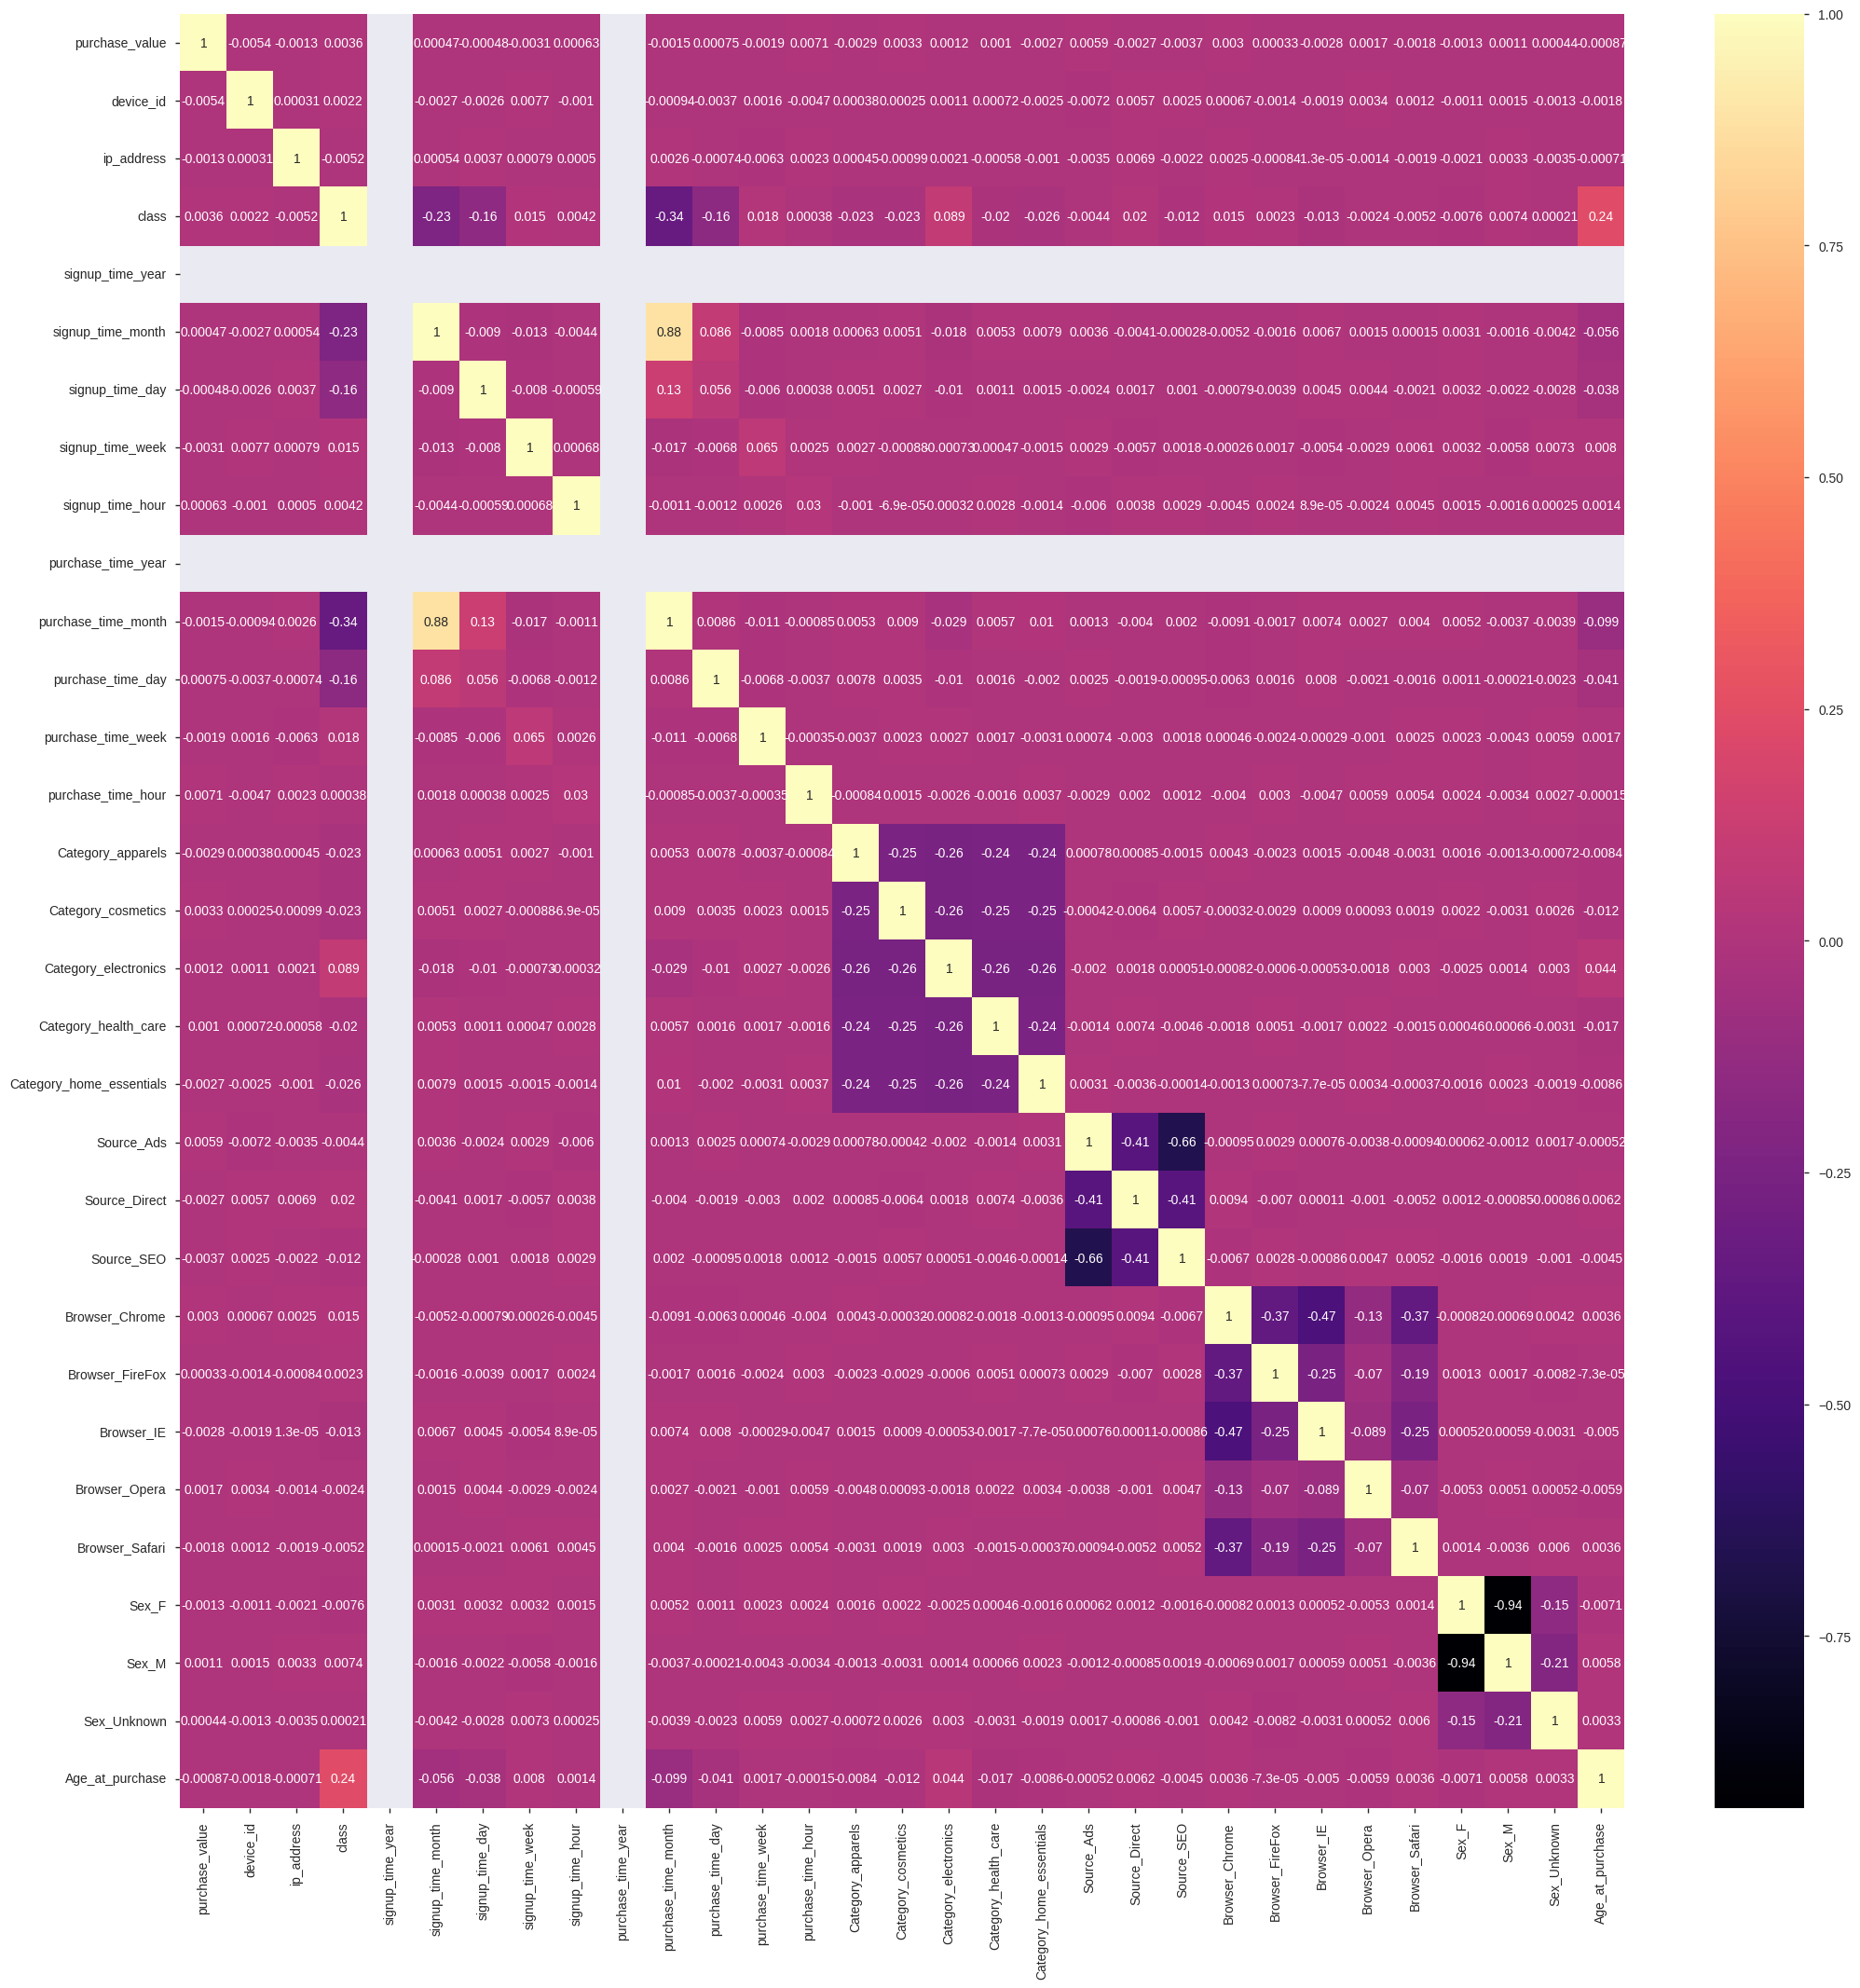

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="magma")

In [ ]:
#v=pd.DataFrame({'Actual': y_test, 'Predicted_Logreg' : y_pred1, 'Predicted_KNeigh' : y_pred2, 'Predicted_naiveB': y_pred3, 'Predicted_SVC' : y_pred4, 'Predicted_Decisionentropy': y_pred5, 'Predicted_Decision_gini': y_pred6})
#v.Actual.value_counts(),v.Predicted_Logreg.value_counts(),v.Predicted_KNeigh.value_counts(),v.Predicted_naiveB.value_counts(),v.Predicted_SVC.value_counts(),v.Predicted_Decisionentropy.value_counts(),v.Predicted_Decision_gini.value_counts()


In [28]:
!pip install dataprep

     |████████████████████████████████| 3.7 MB 14.1 MB/s 
     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 1.5 MB 55.3 MB/s 
     |████████████████████████████████| 10.9 MB 50.7 MB/s 
     |████████████████████████████████| 133 kB 54.5 MB/s 
     |████████████████████████████████| 743 kB 45.3 MB/s 
     |████████████████████████████████| 366 kB 56.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.8 MB/s 
     |████████████████████████████████| 943 kB 49.7 MB/s 
     |████████████████████████████████| 110 kB 74.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
     |████████████████████████████████| 749 kB 40.2 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 57.6 MB/s 
     |████████████████████████████████| 271 kB 57.6 MB/s 
     |████████████████████████████████| 134 kB 64.3 MB/s 
     |████████████████████████████████| 289 kB 58.5 MB/s 
     |███████████

DataPrep Report
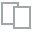
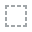
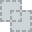
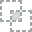
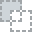
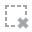
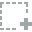
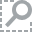
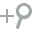
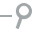
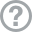
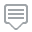
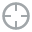
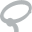
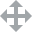
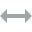
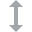
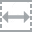
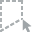
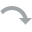
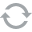
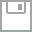
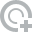
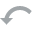
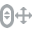
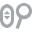
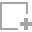
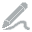
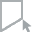
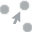
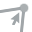
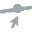

In [73]:
from dataprep.eda import create_report
create_report(data)


#Final Results


*  Almost in every item category frauds happens equally in apparels,cosmetics,
electronics,home essentials and healthcare.


*   Now Frauds happening through which sources are the most is  Ads , SEO , and chrome browser.



*  Internet explorer,firefox and Safari are the second most source of frauds.



*   Opera is the third most source of frauds.

*   According to analysis Males have less normal transaction than females do more fraud transaction than woman(It is not necessary that person filling gender box before fraud is actually correct). 



*  Age at Purchase plays an important role because people who have less duration between signup time and purchase time are more likely to be fraud(Not necessarily all).Fraud person may not necessarily make frauds with the sam identity.


